# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

In [15]:
cities

['severo-yeniseyskiy',
 'fort st. john',
 'pandan',
 'igra',
 "port saint john's",
 'bratsk',
 'port-aux-francais',
 'happy valley-goose bay',
 'seven pagodas',
 'edinburgh of the seven seas',
 'naze',
 'taiohae',
 'urangan',
 'north platte',
 'yuzhno-kurilsk',
 'anadyr',
 'ilulissat',
 'uturoa',
 'invercargill',
 "arkhangel'sk",
 'isafjordur',
 'thompson',
 'lichtenvoorde',
 'motygino',
 'san luis de la loma',
 'hithadhoo',
 'radashkovichy',
 'margate',
 'brejo',
 'susuman',
 'adamstown',
 'chimbote',
 'tralee',
 'ushuaia',
 'udachny',
 'saint-joseph',
 'hammerfest',
 'puerto ayora',
 'buka',
 'faya-largeau',
 'port elizabeth',
 'west island',
 'hawaiian paradise park',
 'carnarvon',
 'sao jose da coroa grande',
 'college',
 'ribeira grande',
 'la passe',
 'codrington',
 'tucuma',
 'bethel',
 'cartagena',
 'weno',
 'aketi',
 'saipan',
 'bredasdorp',
 'sao joao batista',
 'iqaluit',
 'san patricio',
 'tiksi',
 'albany',
 'kargasok',
 'farrukhnagar',
 'gaspe',
 'kruisfontein',
 'fuvahmu

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    print(city)
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

  
    
#     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
    record_count += 1

#     # Run an API request for each of the cities
    try:
#         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
        
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
severo-yeniseyskiy
Processing Record 1 of Set 1 | severo-yeniseyskiy
fort st. john
Processing Record 2 of Set 1 | fort st. john
pandan
Processing Record 3 of Set 1 | pandan
igra
Processing Record 4 of Set 1 | igra
port saint john's
Processing Record 5 of Set 1 | port saint john's
bratsk
Processing Record 6 of Set 1 | bratsk
port-aux-francais
Processing Record 7 of Set 1 | port-aux-francais
happy valley-goose bay
Processing Record 8 of Set 1 | happy valley-goose bay
seven pagodas
Processing Record 9 of Set 1 | seven pagodas
edinburgh of the seven seas
Processing Record 10 of Set 1 | edinburgh of the seven seas
naze
Processing Record 11 of Set 1 | naze
taiohae
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
urangan
Processing Record 13 of Set 1 | urangan
north platte
Processing Record 14 of Set 1 | north platte
yuzhno-kurilsk
Processing Record 15 of Set 1 | yuzhno-kurilsk
anadyr
Processing Record 16 of Set 1 

[{'City': 'severo-yeniseyskiy',
  'Lat': 60.3725,
  'Lng': 93.0408,
  'Max Temp': 263.69,
  'Humidity': 96,
  'Cloudiness': 77,
  'Wind Speed': 1.82,
  'Country': '',
  'Date': ''},
 {'City': 'fort st. john',
  'Lat': 56.2499,
  'Lng': -120.8529,
  'Max Temp': 272.09,
  'Humidity': 80,
  'Cloudiness': 75,
  'Wind Speed': 3.09,
  'Country': '',
  'Date': ''},
 {'City': 'pandan',
  'Lat': 14.0453,
  'Lng': 124.1694,
  'Max Temp': 299.7,
  'Humidity': 87,
  'Cloudiness': 97,
  'Wind Speed': 3.09,
  'Country': '',
  'Date': ''},
 {'City': 'igra',
  'Lat': 57.5558,
  'Lng': 53.0547,
  'Max Temp': 284.92,
  'Humidity': 48,
  'Cloudiness': 98,
  'Wind Speed': 2.17,
  'Country': '',
  'Date': ''},
 {'City': "port saint john's",
  'Lat': -31.6229,
  'Lng': 29.5448,
  'Max Temp': 295.1,
  'Humidity': 50,
  'Cloudiness': 97,
  'Wind Speed': 7.35,
  'Country': '',
  'Date': ''},
 {'City': 'bratsk',
  'Lat': 56.1325,
  'Lng': 101.6142,
  'Max Temp': 272.42,
  'Humidity': 92,
  'Cloudiness': 97,
  '

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [45]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-yeniseyskiy,60.3725,93.0408,263.69,96,77,1.82,RU,1682174359
1,fort st. john,56.2499,-120.8529,272.09,80,75,3.09,CA,1682174175
2,pandan,14.0453,124.1694,299.70,87,97,3.09,PH,1682174364
3,igra,57.5558,53.0547,284.92,48,98,2.17,RU,1682174365
4,port saint john's,-31.6229,29.5448,295.10,50,97,7.35,ZA,1682174365


In [46]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-yeniseyskiy,60.3725,93.0408,263.69,96,77,1.82,RU,1682174359
1,fort st. john,56.2499,-120.8529,272.09,80,75,3.09,CA,1682174175
2,pandan,14.0453,124.1694,299.70,87,97,3.09,PH,1682174364
3,igra,57.5558,53.0547,284.92,48,98,2.17,RU,1682174365
4,port saint john's,-31.6229,29.5448,295.10,50,97,7.35,ZA,1682174365


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [48]:
#convert temperature to Celsius
def temp_conversion(x):
    return (x - 273)
city_data_df['Max Temp'] = city_data_df['Max Temp'].apply(temp_conversion)





,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-yeniseyskiy,60.3725,93.0408,-9.31,96,77,1.82,RU,1682174359
1,fort st. john,56.2499,-120.8529,-0.91,80,75,3.09,CA,1682174175
2,pandan,14.0453,124.1694,26.70,87,97,3.09,PH,1682174364
3,igra,57.5558,53.0547,11.92,48,98,2.17,RU,1682174365
4,port saint john's,-31.6229,29.5448,22.10,50,97,7.35,ZA,1682174365
...,...,...,...,...,...,...,...,...,...
563,huarmey,-10.0681,-78.1522,26.69,73,31,3.88,PE,1682174996
564,binan,14.2637,121.0526,29.79,87,39,3.63,PH,1682174996
565,vernon,50.2581,-119.2691,6.98,75,100,3.60,CA,1682174718


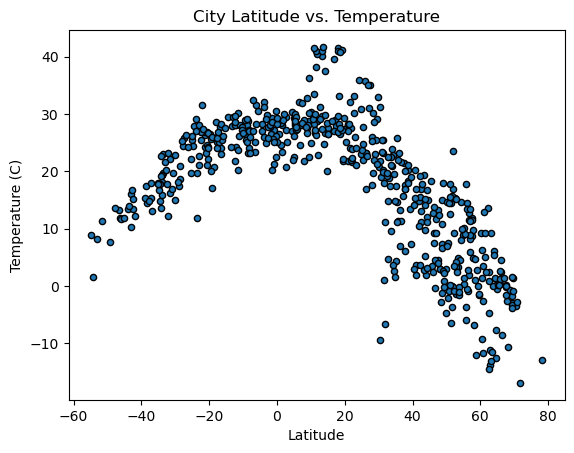

In [53]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolor = 'black', s= 20)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('City Latitude vs. Temperature')



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

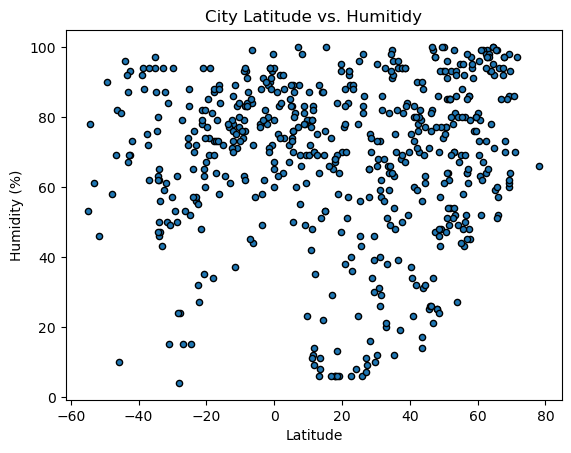

In [54]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolor = 'black', s= 20)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humitidy')
plt.plot(marker = '.', markersize = 5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

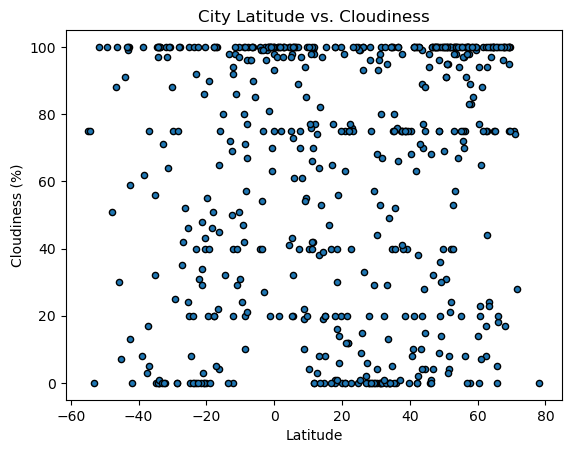

In [55]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolor = 'black', s= 20)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.plot(marker = '.', markersize = 5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

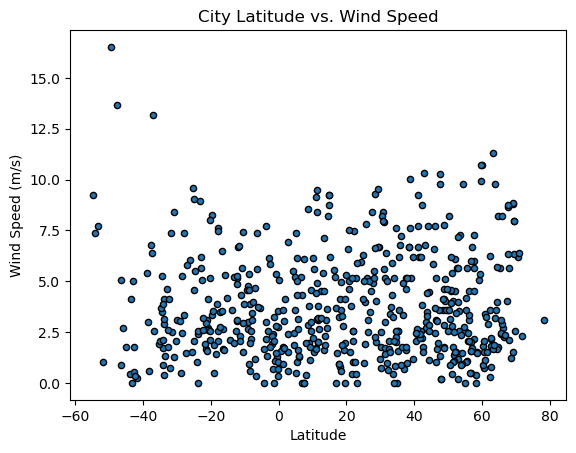

In [56]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolor = 'black', s= 20)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.plot(marker = '.', markersize = 5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    plt.show



In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-yeniseyskiy,60.3725,93.0408,-9.31,96,77,1.82,RU,1682174359
1,fort st. john,56.2499,-120.8529,-0.91,80,75,3.09,CA,1682174175
2,pandan,14.0453,124.1694,26.70,87,97,3.09,PH,1682174364
3,igra,57.5558,53.0547,11.92,48,98,2.17,RU,1682174365
5,bratsk,56.1325,101.6142,-0.58,92,97,4.51,RU,1682174366


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port saint john's,-31.6229,29.5448,22.10,50,97,7.35,ZA,1682174365
6,port-aux-francais,-49.3500,70.2167,7.61,90,100,16.52,TF,1682174366
9,edinburgh of the seven seas,-37.0676,-12.3116,15.39,62,5,13.18,SH,1682174367
11,urangan,-25.3000,152.9000,22.15,74,24,9.58,AU,1682174821
16,uturoa,-16.7333,-151.4333,27.70,79,100,6.49,PF,1682174823


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.84673244822368


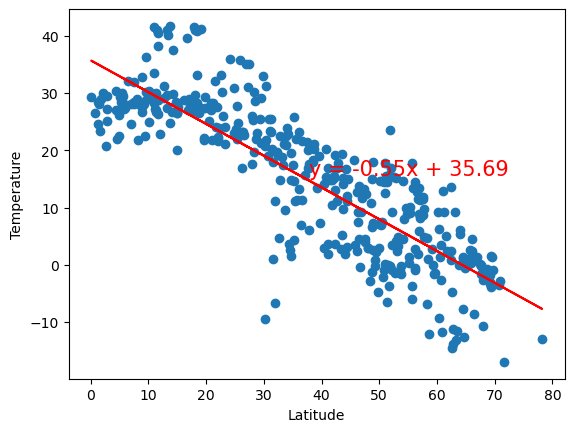

In [73]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.ylabel('Temperature')
plt.xlabel('Latitude')
regression_plot(x_values, y_values)

The r-squared is: 0.8206266939090446


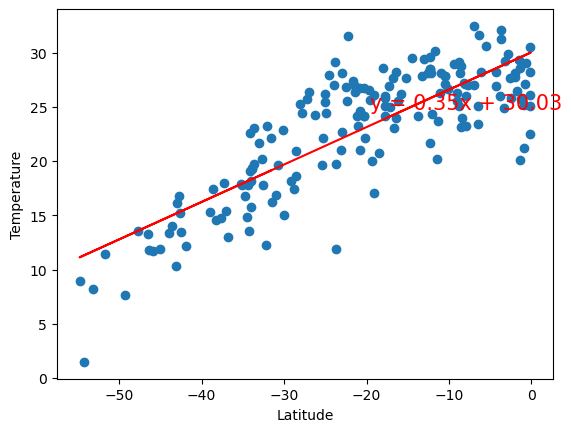

In [74]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.ylabel('Temperature')
plt.xlabel('Latitude')
regression_plot(x_values, y_values)

**Discussion about the linear relationship:** There is a positive correlation between temperature and latitude in the southern hemisphere and a negative correlation in the northern hemisphere. Temperature tends to decrease the further a location is from 0 latitude. The is a strong correlation with both data sets with an r squared value approaching -1 and 1 respectively. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.18485653318539655


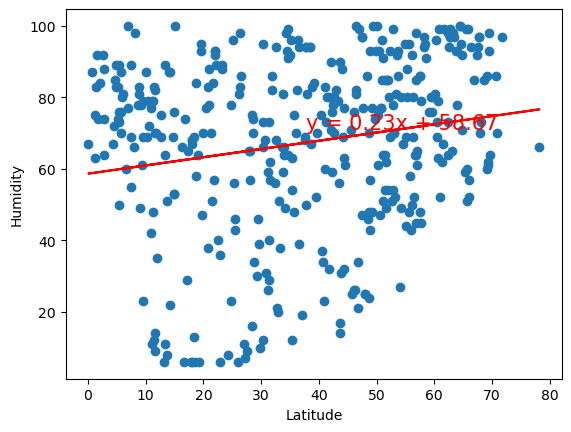

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.ylabel('Humidity')
plt.xlabel('Latitude')
regression_plot(x_values, y_values)

The r-value is: 0.0002808747046324607


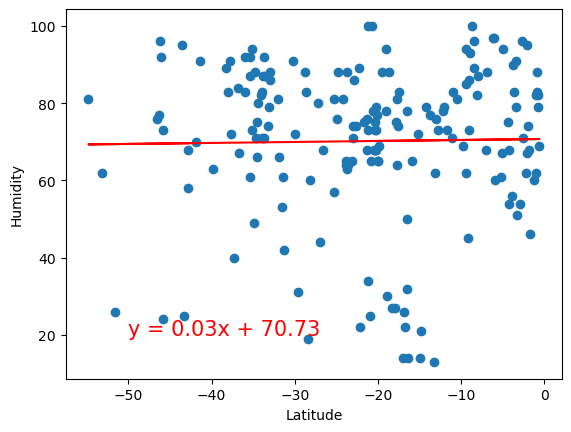

In [18]:
# Southern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.ylabel('Humidity')
plt.xlabel('Latitude')
regression_plot(x_values, y_values)

**Discussion about the linear relationship:** There does not appear to be a high correlation between humidity and the latitude for a location as evdienced by an r squared value approaching zero for both northern and southern hemisphere data sets. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.15098220971957893


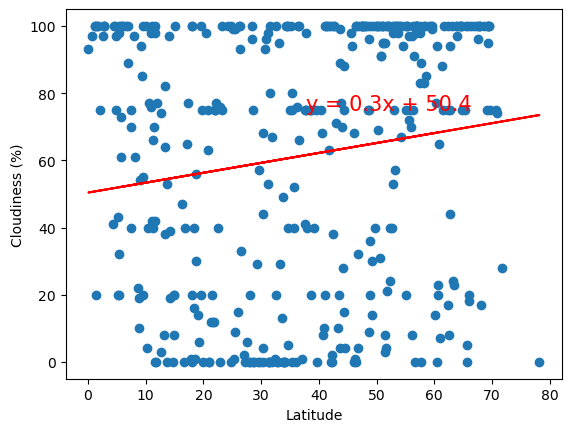

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
regression_plot(x_values, y_values)

The r-squared is: 0.1922831515577015


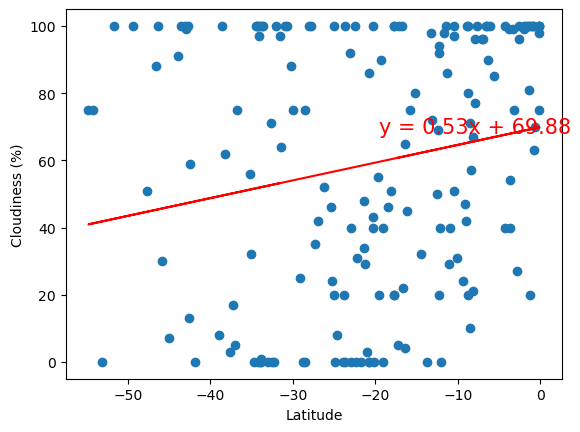

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
regression_plot(x_values, y_values)

**Discussion about the linear relationship:** There does not appear to be a high correlation between cloudiness and the latitude for a location as evdienced by an r squared value approaching zero for both northern and southern hemisphere data sets. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.05746724943868775


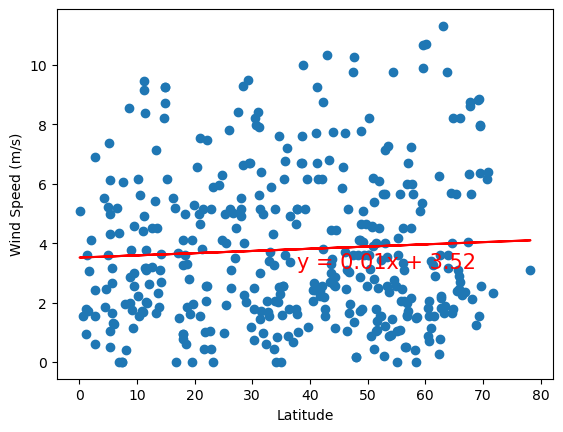

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
regression_plot(x_values, y_values)

The r-squared is: -0.18922965863904406


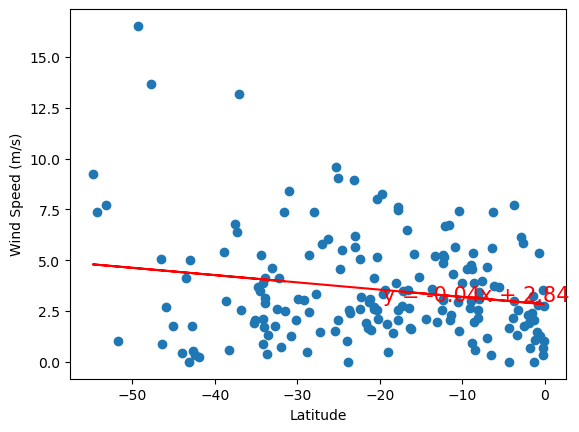

In [79]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
regression_plot(x_values, y_values)

**Discussion about the linear relationship:** There does not appear to be a high correlation between wind speed and the latitude for a location as evdienced by an r squared value approaching zero for both northern and southern hemisphere data sets. 